In [14]:
from google.cloud import storage
import os
import tensorflow as tf
import math
import numpy as np
import itertools
from PIL import Image, ImageDraw
from tensorflow import image
import io
tf.enable_eager_execution()
from yolo3.model import preprocess_true_boxes
## if it is private gcs use storage.Client().fromservice account insted of storage.Client()

In [35]:
def list_blobs_with_prefix(bucket_name, prefix, delimiter=None):
    
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)

    blobs = bucket.list_blobs(prefix=prefix, delimiter=delimiter)
    file_list = []
    for blob in blobs:
        file_list.append('gs://'+bucket_name+'/'+blob.name)

    return file_list

def download_blob2(bucket_name, destination_blob_name):
    """download a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    file_string = blob.download_as_string()
    return file_string

def upload_blob_from_bytes(bucket_name, input_bytes, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_string(input_bytes,content_type='image/png')
    #blob.upload_blob
    print('File {} uploaded to {}.'.format(
        'xyz',
        destination_blob_name))

In [4]:
def int_casting(x):
    return int(float(x))

def annotation(annotation_line, gcs = False, bucket = 'waymo_validation', input_path_gcs = 'Training_data/images/'):
    line = annotation_line.split()
    destination_local = './annotated_images/'
    bucket_destination = 'annotated_images/'
    if gcs == False:
        path = os.path.normpath(line[0]) 
        image = Image.open(path)
    else:
        file_name = input_path+line[0]
        file_string = download_blob2('waymo_validation',file_name)
        image = Image.open(io.BytesIO(file_string))

        
        
    boxes = np.array([np.array(list(map(int_casting,box.split(',')))) for box in line[1:]])
    
    for box in boxes:
        draw = ImageDraw.Draw(image) 
        draw.line((box[0],box[1], box[0],box[3]), fill=128,width=3)
        draw.line((box[0],box[1], box[2],box[1]), fill=128,width=3)
        draw.line((box[2],box[3], box[0],box[3]), fill=128,width=3)
        draw.line((box[2],box[3], box[2],box[1]), fill=128,width=3)
    
    
    if gcs == False:
        ## fix this path if your line[0] is different
        dest_path = destination_local +  line[0].split('/')[-1]
        image.save(dest_path)
    else:
        bucket_destination_path = bucket_destination + 
        annotated_image_bytes = image.tobytes()
        upload_blob_from_bytes(bucket, annotated_image_bytes, destination_blob_name):
            
    file_name = 'Training_data/images/'+line[0]
    
    
    

In [18]:
line = 'waymo_vtraining_front_1.jpg 815.6847343760144,705.7605731280435,836.4997031280434,722.7309993841304,0 820.4226315990063,693.7984203997516,850.7389515990062,708.3313796002485,0 762.3291300000001,711.1703400000001,937.9111499999999,770.5398,0 1475.6861658861042,747.1709700000001,1797.2132141138957,900.01575,0 881.0117917715982,695.3247820157396,896.8015417715981,701.7522979842604,0 343.900755,735.486555,504.95620500000007,843.488445,0 827.6986949999998,708.328185,870.0152249999999,722.854755,0 963.0410725922454,690.3441721228969,989.4569981565467,716.734014290563,0 613.5896850000001,711.486135,693.8016150000001,761.381745,0 893.9916854981363,693.2115548032302,911.0925345018634,709.0140832042241,0 666.1690221765293,702.8802793137745,713.8544207255097,743.1404295494801,0 1219.2844949999999,708.328185,1453.6043849999996,780.9610349999999,0 196.74028499999997,697.2753599999999,370.42753500000003,760.43436,0 805.8019714578215,703.2740218120393,823.2746786240789,727.4756712674043,0 845.9048240154523,690.6872868226205,863.0886194833136,706.4770368226204,0 1443.4989450000003,724.749525,1518.658155,772.1187749999999,0 768.0124778746929,704.3268321662572,797.0636936240787,742.8365039107298,0 1204.4550387928007,770.2143234053995,1507.592421207199,998.2247678018,0 396.6385200000001,699.485925,581.0628,770.855595,0 704.0647757255097,703.59126,734.0649471765291,735.8002287061175,0 854.622003442146,706.1567269383818,885.5707532972735,718.7119927718734,0 1433.6917296986335,803.0778661008694,1920.0,1280.0,0 670.7677476014908,834.6397957995032,1158.355227601491,1242.015345799503,0 1492.9404041247194,582.5627144998398,1920.0,814.5143655001602,0 894.0188396002486,702.6358884993788,911.0653803997516,718.4799467036028,0 786.3295499999999,703.59126,810.3299699999998,732.6444,0 795.7650654591403,733.2951572704299,1074.9278454591404,853.25892272957,0 718.3286807084355,700.8540492915644,782.7489364578214,751.3697037878793,0 157.8975,712.1177250000001,221.0565,842.856855,1 873.4889700000001,703.9070549999999,897.48939,717.170445,0 1353.4973699999996,754.1184600000001,1508.8685099999998,813.48792,0 1087.2956430643026,758.53959,1260.9559769356974,881.06805,0 1028.5925250012347,703.8097513640853,1054.6814386396186,719.5995013640852,0 914.54232,701.3806950000001,972.6486,739.9076849999999,0 0.0,701.0649,88.61192394972349,761.69754,0 866.54148,695.7139553013665,901.91052,711.5771811070815,0 1098.33501,700.1175149999999,1155.17811,720.959985,0 898.2099583823581,690.6628326014908,908.9469883823581,698.8990594034786,0'

In [19]:
line = line.split()
boxes = np.array([np.array(list(map(int_casting,box.split(',')))) for box in line[1:]])

In [26]:
path_attachment = 'Training_data/images/'
file_name = path_attachment+line[0]
file_string = download_blob2('waymo_validation',file_name)
image = Image.open(io.BytesIO(file_string))

In [29]:
for box in boxes:
        draw = ImageDraw.Draw(image) 
        draw.line((box[0],box[1], box[0],box[3]), fill=128,width=3)
        draw.line((box[0],box[1], box[2],box[1]), fill=128,width=3)
        draw.line((box[2],box[3], box[0],box[3]), fill=128,width=3)
        draw.line((box[2],box[3], box[2],box[1]), fill=128,width=3)
        image.show()

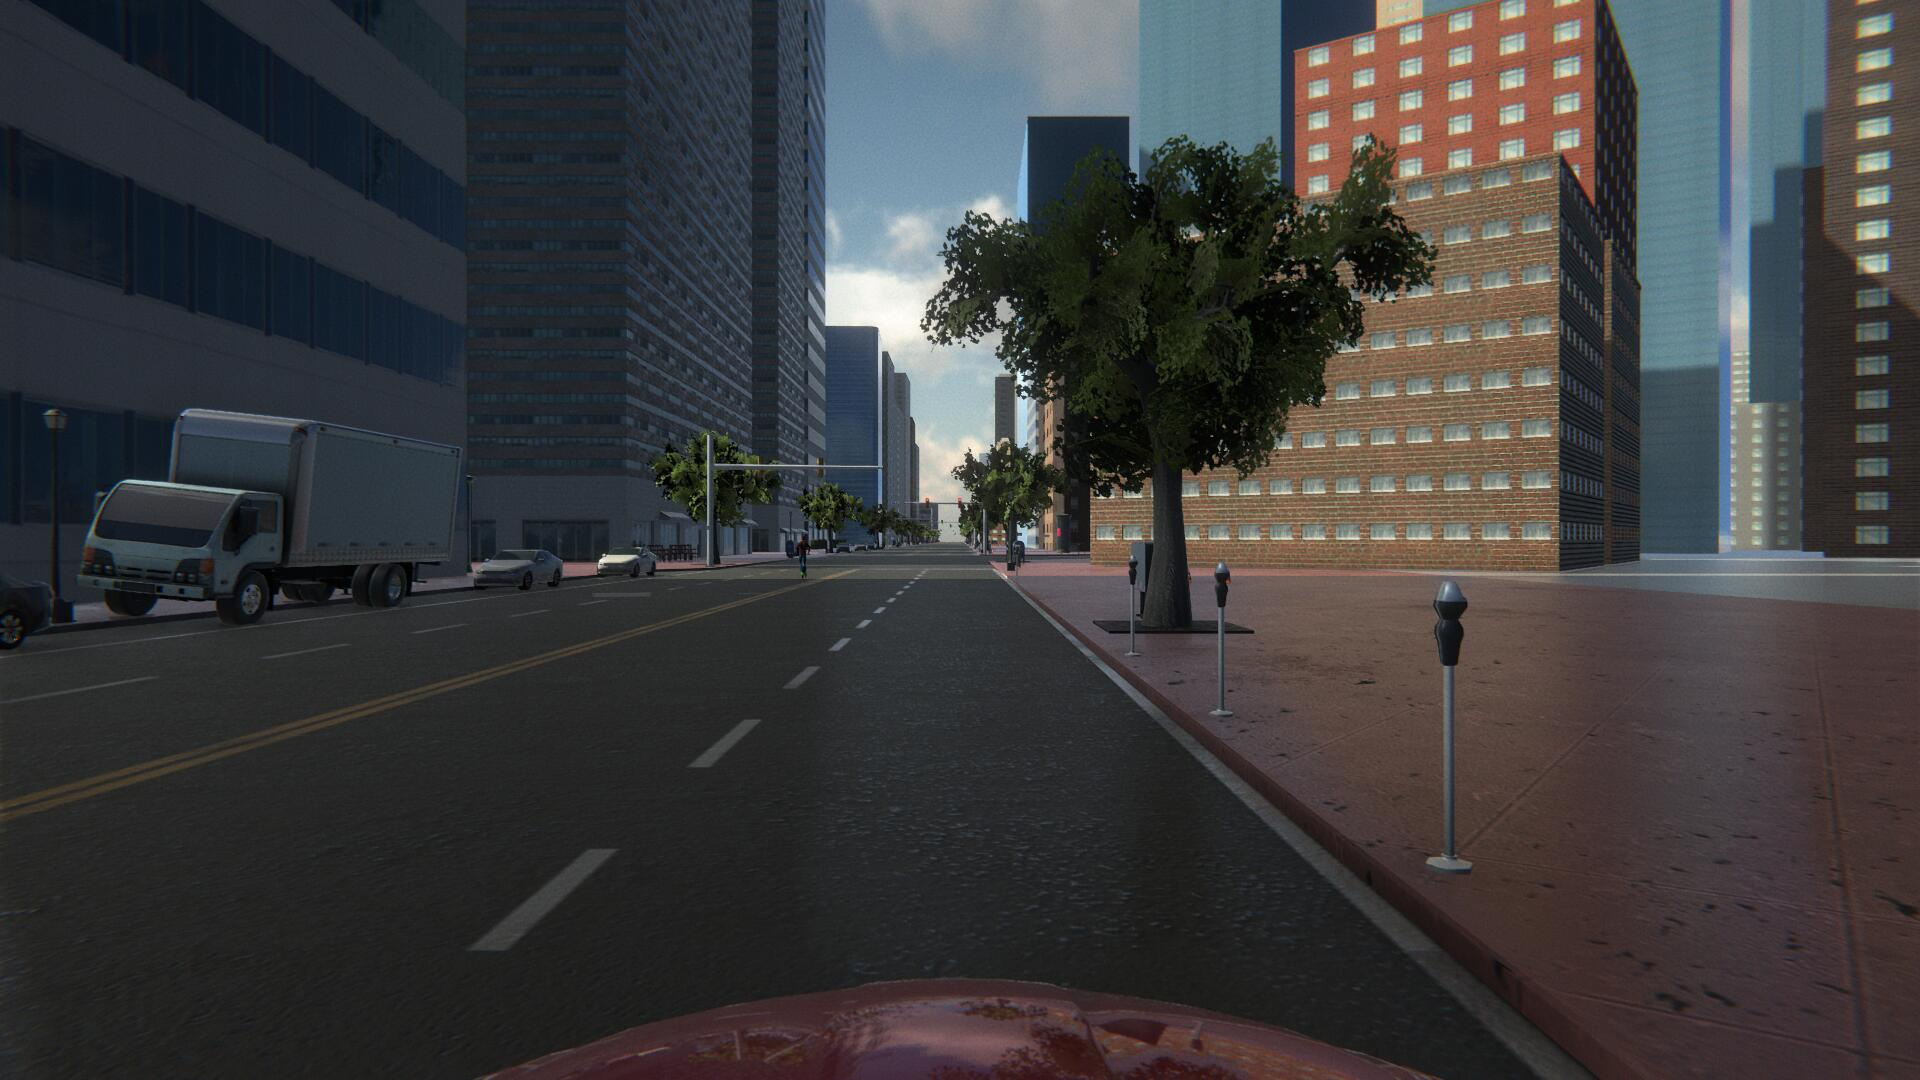

In [129]:
image